# Using Foursquare to predict land prices in São Paulo

_Capstone project for the IBM Professional Data Science Certification program_

In this project we use Foursquare venue locations associated with publicly available land value data to create a model to predict land prices using Regression algorithms.

## Introduction

It is known that close-by amenities can have an impact on land prices. This project intends to cross information already known from land prices in the city of São Paulo with Foursquare venue locations, in order to create a model capable of predicting land prices for a given location in the city.

The following objectives will be pursued by this work:
- Extract statistics and create land price visualizations from public available data on land value;
- Create a simple regression model to predict land prices based on this public data;
- Improve this model by adding venue locations extracted from the Foursquare API;
- Measure and compare the efficiency of each model.

The main beneficiaries from this report will be real estate investors and agents followed by anyone searching for a good place to live in the city. Also, it adds value to the Data Science community as a whole as the result of the conducted research will contribute to evaluate if the use of Foursquare data can benefit other land price prediction models.

## Data

To perform this research, two main datasets will be used:

### [Public data from São Paulo's city hall related with land value in the city](http://dados.prefeitura.sp.gov.br/dataset/base-de-dados-do-imposto-predial-e-territorial-urbano-iptu)
The city Hall of São Paulo has made available data regarding to the land taxes paid in the city. In this data there's also interesting data about the land value by m2 for different neighbourhoods in the city. 

The table below is an example of this data, where columns "BAIRRO DO IMOVEL" and "VALOR DO M2 DO TERRENO" show neighbourhood and the land value by m2, respectively.

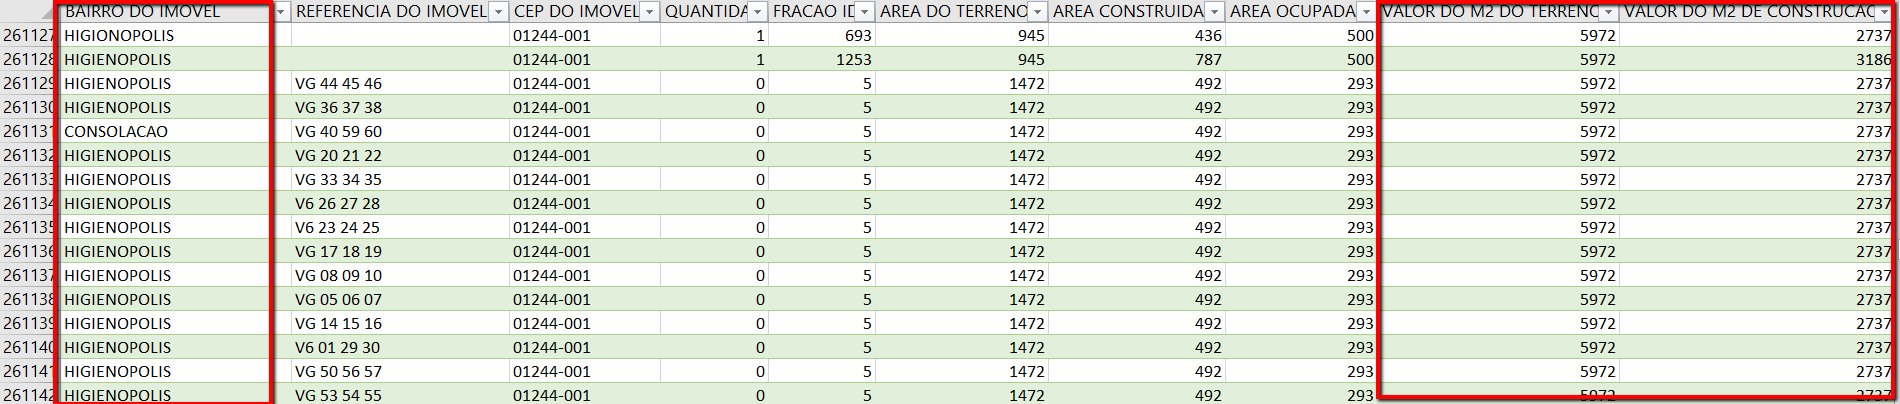


### [Foursquare API](https://developer.foursquare.com/docs) to retrieve venue locations
 
Foursquare holds the location for venues in different categories (bars, cinemas, supermarkets, museums, etc). A location in São Paulo can have many of these different venues, as shown in the image below:
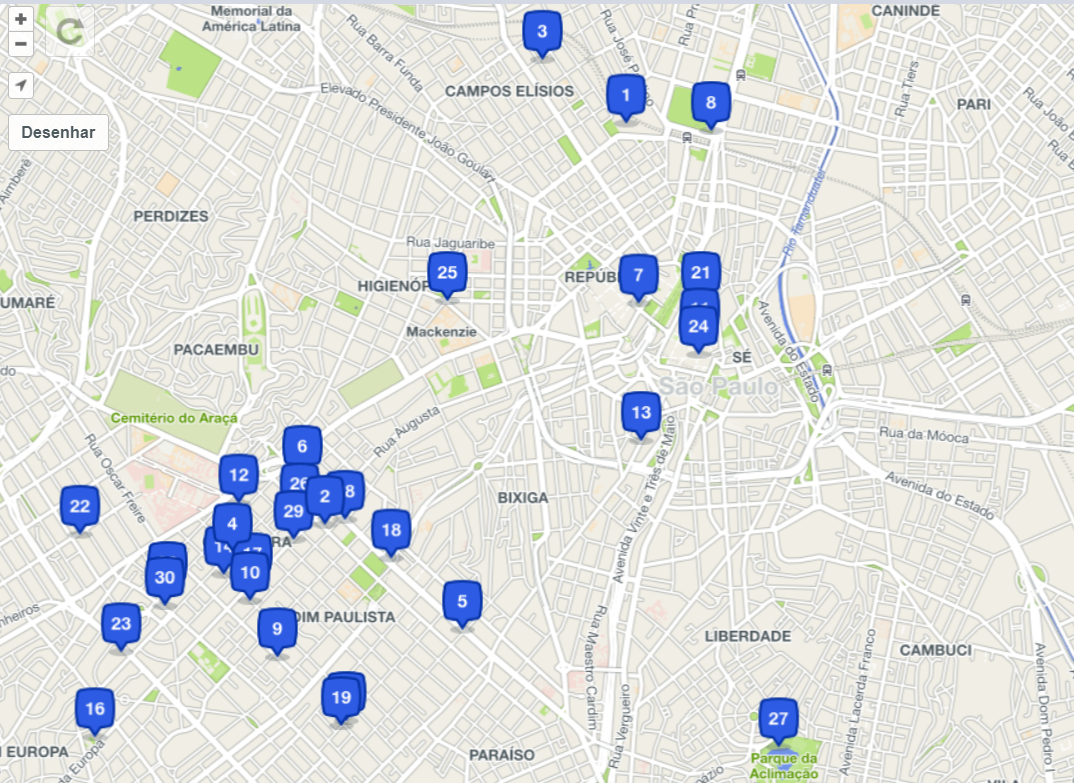

By accessing the Foursquare API one can obtain the venue's data in a convenient JSON like below:

```
[{"id": "4b6da9b6f964a5204c842ce3",
  "name": "Estação Sé (Metrô)",
  "location": {"address": "Pç. da Sé, S/N",
   "crossStreet": "Linha 1/Azul, 3/Vermelha",
   "lat": -23.550561852202886,
   "lng": -46.63299793807663,
   "labeledLatLngs": [{"label": "display",
     "lat": -23.550561852202886,
     "lng": -46.63299793807663}],
   "distance": 21,
   "postalCode": "01508-030",
   "cc": "BR",
   "city": "São Paulo",
   "state": "SP",
   "country": "Brasil",
   "formattedAddress": ["Pç. da Sé, S/N (Linha 1/Azul, 3/Vermelha)",
    "São Paulo, SP",
    "01508-030",
    "Brasil"]},
  "categories": [{"id": "4bf58dd8d48988d1fd931735",
    "name": "Metro Station",
    "pluralName": "Metro Stations",
    "shortName": "Metro",
    "icon": {"prefix": "https://ss3.4sqi.net/img/categories_v2/travel/subway_",
     "suffix": ".png"},
    "primary": true}],
  "referralId": "v-1564281331",
  "hasPerk": false}
  ]
```


### Import required libraries

In [4]:
!conda install -c conda-forge folium=0.10.0 --yes

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.10.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.6.16          |           py36_1         149 KB  conda-forge

The following packages will be UPDATED:

    ca-certificates: 2019.5.15-0       --> 2019.6.16-hecc5488_0 conda-forge
    certifi:         2019.6.16-py36_1  --> 2019.6.16-py36_1     conda-forge

The following packages will be DOWNGRADED:

    openssl:         1.1.1c-h7b6447c_1 --> 1.1.1c-h516909a_0    conda-forge


certifi-2019.6.16    | 149 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [3]:
!conda install fiona pyproj six
!pip install geopandas
!conda upgrade --all

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - fiona
    - pyproj
    - six


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    fiona-1.8.4                |   py36hc38cc03_0         1.0 MB
    certifi-2019.6.16          |           py36_1         156 KB
    pyproj-1.9.6               |   py36h14380d9_0          76 KB
    ------------------------------------------------------------
                                           Total:         1.2 MB

The following packages will be UPDATED:

    certifi:         2019.6.16-py36_1        conda-forge --> 2019.6.16-py36_1    
    openssl:         1.1.1c-h516909a_0       conda-forge --> 1.1.1c-h7b6447c_1   

The following packages will be DOWNGRADED:

    ca-certificates: 2019.6.16-hecc5488_0    conda-forge --> 2019.5.15-0         
    fiona:           1.8.4-py36heb3606

In [5]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
from pandas.plotting import scatter_matrix
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geopandas as gpd
import matplotlib.pyplot as plt
import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import folium
import types
import os
import json
import requests
from botocore.client import Config
import ibm_boto3
from urllib.request import urlopen

In [6]:
# The code was removed by Watson Studio for sharing.

### Import land value data

Import the data obtained from São Paulo's City Hall website. 

In [7]:
def __iter__(self): return 0

def loadLandValueData():
    dfs = []
    for i in range(1, 5):
      filename = 'iptu_part' + str(i) + '.csv'
      body = client_93b20a0e90b54e3c9d0d700a2bf9329c.get_object(Bucket='usingfoursquaretopredictlandvalue-donotdelete-pr-z9iaiiaobxybrj',Key=filename)['Body']
      if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )
      df_data = pd.read_csv(body, encoding='cp1252')
      dfs.append(df_data)
    return pd.concat(dfs, sort=True)

In [8]:
landvalueDF = loadLandValueData()
landvalueDF.shape

(3219739, 19)

Let's examine our data:

In [22]:
landvalueDF.head()

,ANO DA CONSTRUCAO CORRIGIDO,AREA CONSTRUIDA,AREA DO TERRENO,AREA OCUPADA,BAIRRO DO IMOVEL,CEP DO IMOVEL,COMPLEMENTO DO IMOVEL,FATOR DE OBSOLESCENCIA,FRACAO IDEAL,NOME DE LOGRADOURO DO IMOVEL,NUMERO DO IMOVEL,QUANTIDADE DE ESQUINAS/FRENTES,QUANTIDADE DE PAVIMENTOS,REFERENCIA DO IMOVEL,TIPO DE PADRAO DA CONSTRUCAO,TIPO DE TERRENO,TIPO DE USO DO IMOVEL,VALOR DO M2 DE CONSTRUCAO,VALOR DO M2 DO TERRENO
0,1924,135,136,108,SANTA EFIGENIA,01104-001,NaN,2,1,R S CAETANO,13.0,1,1,NaN,Comercial horizontal - padrão B,De esquina,Loja,1478,1984
1,1944,67,90,67,SANTA EFIGENIA,01104-001,NaN,2,1,R S CAETANO,19.0,0,1,NaN,Comercial horizontal - padrão B,Normal,Loja,1478,1984
2,1965,140,105,84,SANTA EFIGENIA,01104-001,NaN,37,1,R S CAETANO,27.0,0,2,NaN,Comercial horizontal - padrão B,Normal,Loja,1478,1984
3,1944,103,108,86,NaN,01104-001,NaN,2,1,R S CAETANO,33.0,0,1,NaN,Comercial horizontal - padrão B,Normal,Loja,1478,1984
4,1944,98,120,96,NaN,01104-001,NaN,2,1,R S CAETANO,39.0,0,1,NaN,Comercial horizontal - padrão B,Normal,Loja,1478,1984


In [15]:
landvalueDF['VALOR DO M2 DO TERRENO'].astype(str).value_counts()

65       35479
43       32328
63       10783
538      10458
193       8557
418       7264
308       6833
374       6682
352       6570
400       6247
431       6119
44        5676
908       5665
402       5531
188       5431
328       5207
330       5141
543       5013
370       4984
356       4974
223       4899
549       4836
775       4832
766       4811
376       4672
619       4665
689       4607
595       4600
545       4595
361       4561
         ...  
4358         1
7055         1
4704         1
4696         1
14998        1
5355         1
5035         1
4346         1
4644         1
4781         1
8752         1
2981         1
3583         1
5980         1
4731         1
5045         1
4620         1
8043         1
3549         1
6177         1
3502         1
3099         1
4870         1
6718         1
4216         1
4295         1
3903         1
3294         1
3866         1
5811         1
Name: VALOR DO M2 DO TERRENO, Length: 5267, dtype: int64

In [16]:
landvalueDF.sort_values(by ='VALOR DO M2 DO TERRENO', ascending=False).head(10)

,ANO DA CONSTRUCAO CORRIGIDO,AREA CONSTRUIDA,AREA DO TERRENO,AREA OCUPADA,BAIRRO DO IMOVEL,CEP DO IMOVEL,COMPLEMENTO DO IMOVEL,FATOR DE OBSOLESCENCIA,FRACAO IDEAL,NOME DE LOGRADOURO DO IMOVEL,NUMERO DO IMOVEL,QUANTIDADE DE ESQUINAS/FRENTES,QUANTIDADE DE PAVIMENTOS,REFERENCIA DO IMOVEL,TIPO DE PADRAO DA CONSTRUCAO,TIPO DE TERRENO,TIPO DE USO DO IMOVEL,VALOR DO M2 DE CONSTRUCAO,VALOR DO M2 DO TERRENO
173986,1964,136,1785,850,90,01310-100,CONJ 503 G 89 E,35,71,AV PAULISTA,726.0,0,19,NaN,Comercial vertical - padrão B,Normal,Escritório/consultório em condomínio (unidade ...,1894,24639
173603,1975,27,5146,5000,MATR 30995 EDIFICIO,01311-100,813 VAGA 1 SUB S,54,3,AV PAULISTA,807.0,2,26,NaN,Comercial vertical - padrão C,De esquina,Garagem (unidade autônoma) em edifício em cond...,2288,24639
173601,1975,27,5146,5000,MATR 30993 EDIFICIO,01311-100,813 VAGA 1 SUB S,54,3,AV PAULISTA,807.0,2,26,NaN,Comercial vertical - padrão C,De esquina,Garagem (unidade autônoma) em edifício em cond...,2288,24639
173600,1975,27,5146,5000,MATR 30992 EDIFICIO,01311-100,813 VAGA 1 SUB S,54,3,AV PAULISTA,807.0,2,26,NaN,Comercial vertical - padrão C,De esquina,Garagem (unidade autônoma) em edifício em cond...,2288,24639
173599,1975,27,5146,5000,MATR 30991 EDIFICIO,01311-100,813 VAGA 1 SUB S,54,3,AV PAULISTA,807.0,2,26,NaN,Comercial vertical - padrão C,De esquina,Garagem (unidade autônoma) em edifício em cond...,2288,24639
173598,1975,27,5146,5000,MATR 30990 EDIFICIO,01311-100,813 VAGA 1 SUB S,54,3,AV PAULISTA,807.0,2,26,NaN,Comercial vertical - padrão C,De esquina,Garagem (unidade autônoma) em edifício em cond...,2288,24639
173597,1975,27,5146,5000,MATR 30989 EDIFICIO,01311-100,813 VAGA 1 SUB S,54,3,AV PAULISTA,807.0,2,26,NaN,Comercial vertical - padrão C,De esquina,Garagem (unidade autônoma) em edifício em cond...,2288,24639
173596,1975,27,5146,5000,MATR 30988 EDIFICIO,01311-100,813 VAGA 1 SUB S,54,3,AV PAULISTA,807.0,2,26,NaN,Comercial vertical - padrão C,De esquina,Garagem (unidade autônoma) em edifício em cond...,2288,24639
173595,1975,27,5146,5000,MATR 30987 EDIFICIO,01311-100,813 VAGA 1 SUB S,54,3,AV PAULISTA,807.0,2,26,NaN,Comercial vertical - padrão C,De esquina,Garagem (unidade autônoma) em edifício em cond...,2288,24639
173594,1975,27,5146,5000,MATR 30986 EDIFICIO,01311-100,813 VAGA 1 SUB S,54,3,AV PAULISTA,807.0,2,26,NaN,Comercial vertical - padrão C,De esquina,Garagem (unidade autônoma) em edifício em cond...,2288,24639


In [23]:
landvalueDF.dtypes

ANO DA CONSTRUCAO CORRIGIDO         int64
AREA CONSTRUIDA                     int64
AREA DO TERRENO                     int64
AREA OCUPADA                        int64
BAIRRO DO IMOVEL                   object
CEP DO IMOVEL                      object
COMPLEMENTO DO IMOVEL              object
FATOR DE OBSOLESCENCIA              int64
FRACAO IDEAL                        int64
NOME DE LOGRADOURO DO IMOVEL       object
NUMERO DO IMOVEL                  float64
QUANTIDADE DE ESQUINAS/FRENTES      int64
QUANTIDADE DE PAVIMENTOS            int64
REFERENCIA DO IMOVEL               object
TIPO DE PADRAO DA CONSTRUCAO       object
TIPO DE TERRENO                    object
TIPO DE USO DO IMOVEL              object
VALOR DO M2 DE CONSTRUCAO           int64
VALOR DO M2 DO TERRENO              int64
dtype: object

Discard some columns that will not be relevant and translate the remaining columns:

In [24]:
landvalueDF.drop(columns=[   
    'CEP DO IMOVEL',
    'COMPLEMENTO DO IMOVEL',
    'NOME DE LOGRADOURO DO IMOVEL',
    'NUMERO DO IMOVEL',
    'REFERENCIA DO IMOVEL'
], inplace=True)

In [25]:
landvalueDF.rename(columns={
    'ANO DA CONSTRUCAO CORRIGIDO':'CONSTRUCTION YEAR',
    'AREA CONSTRUIDA':'CONSTRUCTED AREA',
    'AREA DO TERRENO':'TOTAL AREA',
    'AREA OCUPADA':'SOIL OCCUPATION',
    'BAIRRO DO IMOVEL':'NEIGHBOURHOOD',
    'FATOR DE OBSOLESCENCIA':'OBSOLESCENCE FACTOR',
    'FRACAO IDEAL':'MINIMUN FRACTION',
    'QUANTIDADE DE ESQUINAS/FRENTES':'NUMBER OF FACADES',
    'QUANTIDADE DE PAVIMENTOS':'NUMBER OF FLOORS',
    'TIPO DE PADRAO DA CONSTRUCAO':'CONSTRUCTION TYPE',
    'TIPO DE TERRENO':'LAND POSITION',
    'TIPO DE USO DO IMOVEL':'TYPE',    
    'VALOR DO M2 DE CONSTRUCAO':'CONSTRUCTED M2 PRICE',
    'VALOR DO M2 DO TERRENO':'BARE M2 PRICE'
}, inplace=True)

In [26]:
landvalueDF.head()

,CONSTRUCTION YEAR,CONSTRUCTED AREA,TOTAL AREA,SOIL OCCUPATION,NEIGHBOURHOOD,OBSOLESCENCE FACTOR,MINIMUN FRACTION,NUMBER OF FACADES,NUMBER OF FLOORS,CONSTRUCTION TYPE,LAND POSITION,TYPE,CONSTRUCTED M2 PRICE,BARE M2 PRICE
0,1924,135,136,108,SANTA EFIGENIA,2,1,1,1,Comercial horizontal - padrão B,De esquina,Loja,1478,1984
1,1944,67,90,67,SANTA EFIGENIA,2,1,0,1,Comercial horizontal - padrão B,Normal,Loja,1478,1984
2,1965,140,105,84,SANTA EFIGENIA,37,1,0,2,Comercial horizontal - padrão B,Normal,Loja,1478,1984
3,1944,103,108,86,NaN,2,1,0,1,Comercial horizontal - padrão B,Normal,Loja,1478,1984
4,1944,98,120,96,NaN,2,1,0,1,Comercial horizontal - padrão B,Normal,Loja,1478,1984


We can create a new column M2 PRICE and let it be the mean between the CONSTRUCTED M2 PRICE and	BARE M2 PRICE. This will be our prediction target.

In [27]:
districts = ["BELA VISTA","LIBERDADE","PARI","MOOCA","VILA ANDRADE","CAMBUCI","ITAIM BIBI","CONSOLACAO","PINHEIROS","VILA LEOPOLDINA","CAMPO LIMPO","MORUMBI","IPIRANGA","RAPOSO TAVARES","JARDIM PAULISTA","RIO PEQUENO","ALTO DE PINHEIROS","CURSINO","REPUBLICA","JABAQUARA","BELEM","CIDADE ADEMAR","CAMPO BELO","VILA MARIANA","VILA PRUDENTE","VILA GUILHERME","SANTANA","PERDIZES","VILA FORMOSA","SANTO AMARO","LAPA","SE","ERMELINO MATARAZZO","CASA VERDE","ANHANGUERA","VILA MEDEIROS","VILA MARIA","PERUS","BARRA FUNDA","MANDAQUI","ARICANDUVA","TUCURUVI","PENHA","SAPOPEMBA","PIRITUBA","CACHOEIRINHA","MOEMA","PARQUE DO CARMO","IGUATEMI","VILA MATILDE","ARTUR ALVIM","ITAQUERA","PONTE RASA","VILA JACUI","JAGUARA","LAJEADO","GUAIANASES","CIDADE TIRADENTES","ITAIM PAULISTA","CARRAO","JARDIM HELENA","PARELHEIROS","MARSILAC","SOCORRO","PEDREIRA","CIDADE DUTRA","CAMPO GRANDE","BOM RETIRO","VILA SONIA","JAGUARE","JARDIM SAO LUIS","JARDIM ANGELA","AGUA RASA","CAPAO REDONDO","LIMAO","SACOMA","SAUDE","SANTA CECILIA","TATUAPE","SAO LUCAS","BUTANTA","SAO DOMINGOS","JARAGUA","BRAS","FREGUESIA DO O","BRASILANDIA","TREMEMBE","JACANA","CANGAIBA","CIDADE LIDER","SAO MATEUS","SAO RAFAEL","JOSE BONIFACIO","SAO MIGUEL","GRAJAU","VILA CURUCA"]
landvalueDF = landvalueDF[landvalueDF['NEIGHBOURHOOD'].isin(districts)]

landvalueDF['M2 PRICE'] = (landvalueDF['CONSTRUCTED M2 PRICE'] + landvalueDF['BARE M2 PRICE']) / 2
landvalueDF.drop(columns=[
    'CONSTRUCTED M2 PRICE',
    'BARE M2 PRICE'
], inplace=True)

landvalueDF.head()

,CONSTRUCTION YEAR,CONSTRUCTED AREA,TOTAL AREA,SOIL OCCUPATION,NEIGHBOURHOOD,OBSOLESCENCE FACTOR,MINIMUN FRACTION,NUMBER OF FACADES,NUMBER OF FLOORS,CONSTRUCTION TYPE,LAND POSITION,TYPE,M2 PRICE
5,1954,1804,310,285,BOM RETIRO,2,1,0,8,Residencial vertical - padrão C,Normal,"Prédio de apartamento, não em condomínio, de u...",1939.0
170,1924,100,116,92,BOM RETIRO,2,1,0,1,Residencial horizontal - padrão C,Normal,Residência,1257.5
296,1970,280,148,140,SANTANA,46,1,2,2,Comercial horizontal - padrão B,De duas ou mais frentes,Loja,1225.0
344,1970,300,200,150,BARRA FUNDA,46,1,0,2,Comercial horizontal - padrão B,Normal,Loja e residência (predominância comercial),1208.0
411,1961,175,300,155,BOM RETIRO,3,13,0,7,Comercial vertical - padrão B,Normal,Loja em edifício em condomínio (unidade autônoma),1410.5


In [28]:
landvalueDF.dtypes

CONSTRUCTION YEAR        int64
CONSTRUCTED AREA         int64
TOTAL AREA               int64
SOIL OCCUPATION          int64
NEIGHBOURHOOD           object
OBSOLESCENCE FACTOR      int64
MINIMUN FRACTION         int64
NUMBER OF FACADES        int64
NUMBER OF FLOORS         int64
CONSTRUCTION TYPE       object
LAND POSITION           object
TYPE                    object
M2 PRICE               float64
dtype: object

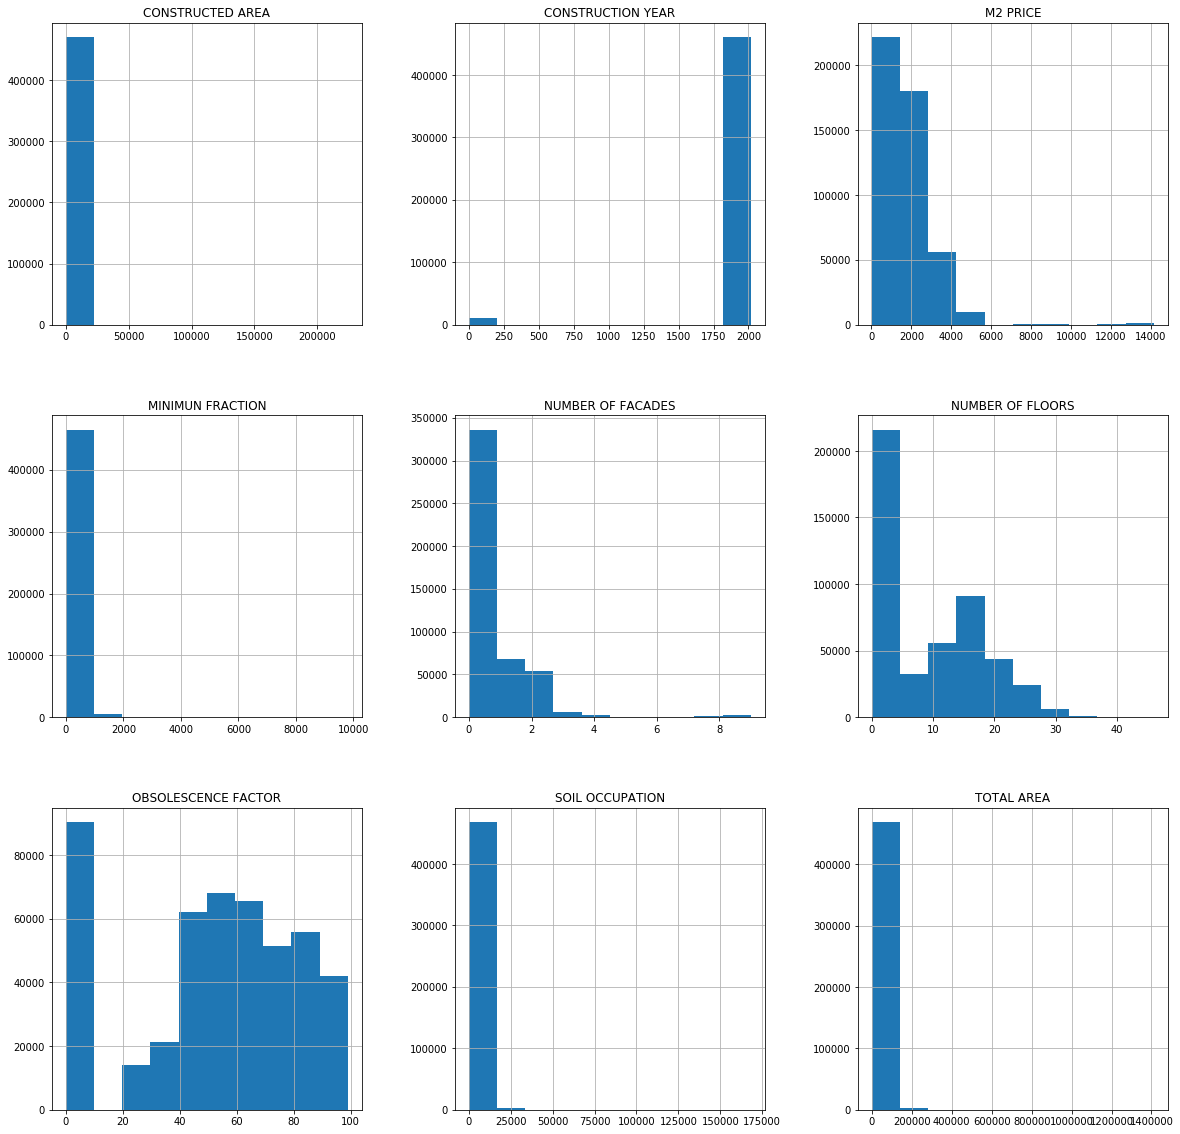

In [32]:
landvalueDF.hist(figsize=(20, 20));

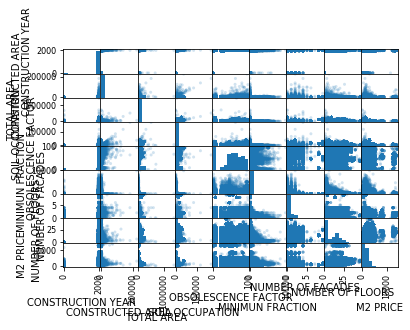

In [37]:
scatter_matrix(landvalueDF, alpha=0.2);

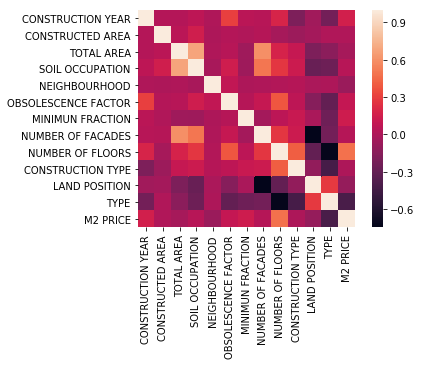

In [13]:
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

# Calculate the correlation and plot it
encoded_data, _ = number_encode_features(landvalueDF)
sns.heatmap(encoded_data.corr(), square=True)
plt.show()

In [14]:
landvalueDF[['NUMBER OF FLOORS', 'M2 PRICE']].sample(10)

,NUMBER OF FLOORS,M2 PRICE
103265,8,2806.5
6200,4,1013.5
489390,17,2424.0
167848,9,596.5
84051,2,1484.0
19359,2,878.5
272919,2,1062.5
484046,2,903.0
117685,16,1191.0
127347,16,1870.0


In [15]:
landvalueDF[['TYPE', 'M2 PRICE']].sample(10)

,TYPE,M2 PRICE
735649,Indústria,1122.5
461486,Garagem (unidade autônoma) em edifício em cond...,1527.0
652718,Garagem (unidade autônoma) em edifício em cond...,1761.5
196312,Apartamento em condomínio,2455.5
56249,Apartamento em condomínio,806.5
649478,Apartamento em condomínio,1673.5
176308,Apartamento em condomínio,3107.0
504186,"Residência coletiva, exclusive cortiço (mais d...",1294.0
783479,Apartamento em condomínio,1211.5
499215,Residência,917.0


In [16]:
encoded_data.sample(10)

,CONSTRUCTION YEAR,CONSTRUCTED AREA,TOTAL AREA,SOIL OCCUPATION,NEIGHBOURHOOD,OBSOLESCENCE FACTOR,MINIMUN FRACTION,NUMBER OF FACADES,NUMBER OF FLOORS,CONSTRUCTION TYPE,LAND POSITION,TYPE,M2 PRICE
492083,1996,70,68,36,28,82,1,0,2,18,4,31,617.0
37544,1996,115,988,858,51,82,157,0,17,8,4,7,2883.5
68100,2008,141,1604,1322,47,94,103,0,26,24,4,0,1985.0
120616,1991,62,1080,838,51,76,96,1,12,24,1,0,3067.0
28168,1960,120,105,60,52,2,1,0,2,17,4,31,1119.0
698563,1974,105,105,53,49,52,1,0,2,18,4,31,955.5
662663,1975,232,280,136,90,54,1,1,2,4,1,18,3815.5
229067,1982,86,1218,500,25,64,104,1,11,24,1,0,4412.0
307238,1987,117,1252,416,61,71,146,0,15,24,4,0,2911.5
666995,1971,29,2195,1980,69,48,6,2,14,24,0,14,2151.5


In [17]:
encoded_data.dtypes

CONSTRUCTION YEAR        int64
CONSTRUCTED AREA         int64
TOTAL AREA               int64
SOIL OCCUPATION          int64
NEIGHBOURHOOD            int64
OBSOLESCENCE FACTOR      int64
MINIMUN FRACTION         int64
NUMBER OF FACADES        int64
NUMBER OF FLOORS         int64
CONSTRUCTION TYPE        int64
LAND POSITION            int64
TYPE                     int64
M2 PRICE               float64
dtype: object

In [24]:
# Split and scale the data
encoded_data, encoders = number_encode_features(landvalueDF)
X = encoded_data[['NUMBER OF FLOORS']]
y = encoded_data[['M2 PRICE']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
y_pred = model.predict(X_test)

'RMSE: 1104.23'

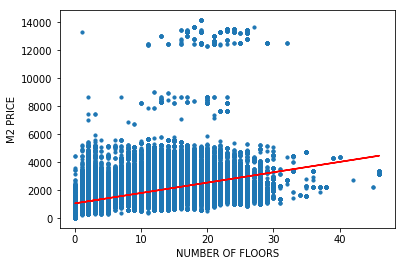

In [29]:
plt.scatter(X_test, y_test, s=10)
plt.xlabel('NUMBER OF FLOORS')
plt.ylabel('M2 PRICE')

# predicted values
plt.plot(X_test, y_pred, color='r')
plt.show()

In [27]:
mse = mean_squared_error(y_test, y_pred)
mse

1219322.804698563

In [30]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

1104.229507257691

In [28]:
r2 = r2_score(y_test, y_pred)
r2

0.23352478758489437

### Multiple Linear Regression with One Hot Encoding

In [ ]:
# Copy the original data
features = landvalueDF.copy()

# Select the numeric columns
numeric_subset = landvalueDF.select_dtypes('number')
categorical_subset = landvalueDF.select_dtypes('object')

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)
features.head()

In [154]:
# Split and scale the data
encoded_data, encoders = number_encode_features(landvalueDF)
X = encoded_data[["NUMBER OF FLOORS"]]
y = encoded_data[["M2 PRICE"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#scaler = preprocessing.StandardScaler()

#X_train
#X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
#X_test = scaler.transform(X_test)

In [155]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [156]:
y_pred = model.predict(X_test)

'RMSE: %.2f' % np.sqrt(mean_squared_error(y_test, y_pred))

'RMSE: 1104.23'

In [157]:
rmse = mean_squared_error(y_test, y_pred)
rmse

1219322.804698563

In [158]:
r2 = r2_score(y_test, y_pred)
r2

0.23352478758489437

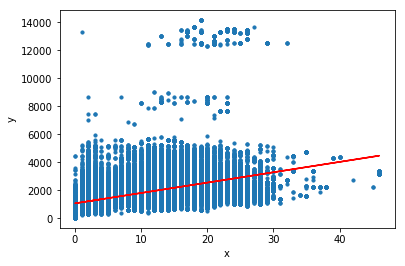

In [159]:
plt.scatter(X_test, y_test, s=10)
plt.xlabel('x')
plt.ylabel('y')

# predicted values
plt.plot(X_test, y_pred, color='r')
plt.show()

In [121]:
X_test.shape

(141307, 178)

In [123]:
y_test.size

141307

In [124]:
y_pred.size

141307

ValueError: x and y must be the same size

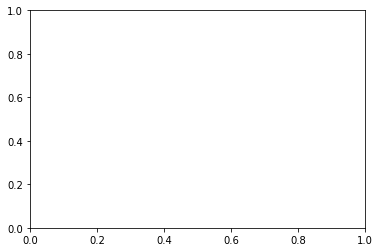

In [132]:
a,b = model.coef_, model.intercept_
plt.scatter(X_train, y_train)
plt.plot(X_train, X_train*a +b, c='red')
plt.title('Linear Regression')
plt.xlabel('m2total')
plt.ylabel('preciousd')

In [110]:
y_test

491764    1997.0
440951    1852.0
221288    1254.5
44933      920.0
10785      747.5
586133    1465.5
87388      629.0
485260    2327.5
642409    1139.5
573632    1313.0
411325    1519.5
202324    2764.0
291590    2887.0
154391    1621.5
21301     3303.5
292327    3045.5
134481    4801.0
64145     2093.5
290344    3058.0
225033    1192.0
190415    4479.0
539156    1400.0
218855    1087.5
121522    2815.5
424804    2630.0
381669    1618.0
115433    1289.5
495125     756.5
627027    2472.0
359479    1835.0
           ...  
129178    1956.0
282904    2078.5
611828    1906.0
949458     187.0
689538     967.5
635800    1531.5
328068    4690.5
489035    2582.5
393086    2143.5
489936     692.0
205500    3994.0
153878    2193.5
28696     1157.0
616686    1637.5
60687      624.0
86827     2158.0
402199    1327.0
606083    1976.0
460523    1159.5
196416    1203.5
627998    1923.0
286004    2289.0
35204     1225.0
253866    1711.5
721922    1032.0
194095    2520.0
744476    1177.5
131493    2573

In [111]:
y_pred

array([1997. , 1852. , 1254.5, ..., 2573.5, 1221.5, 1675. ])

In [70]:
landvalueDF.describe()

,CONSTRUCTION YEAR,CONSTRUCTED AREA,TOTAL AREA,SOIL OCCUPATION,OBSOLESCENCE FACTOR,MINIMUN FRACTION,NUMBER OF FACADES,NUMBER OF FLOORS,M2 PRICE
count,471023.000000,471023.000000,4.710230e+05,471023.000000,471023.000000,471023.000000,471023.000000,471023.000000,471023.000000
mean,1940.171646,179.480817,3.729953e+03,1067.099776,52.907115,103.891525,0.516113,9.403651,1758.216203
std,288.134212,1062.177893,1.615480e+04,2616.623993,29.645705,261.959794,1.115161,8.166552,1259.788406
min,0.000000,0.000000,2.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,21.500000
25%,1971.000000,68.000000,2.100000e+02,103.000000,35.000000,1.000000,0.000000,2.000000,935.500000
50%,1981.000000,105.000000,8.000000e+02,360.000000,57.000000,17.000000,0.000000,9.000000,1523.500000
75%,1993.000000,160.000000,1.800000e+03,1000.000000,76.000000,115.000000,1.000000,16.000000,2298.500000
max,2016.000000,224269.000000,1.411450e+06,168166.000000,99.000000,9802.000000,9.000000,46.000000,14137.000000


In [38]:
landvalueDF['NEIGHBOURHOOD'].value_counts()

TATUAPE              25693
BELA VISTA           22131
PERDIZES             21220
SANTANA              18629
ITAQUERA             18149
SAUDE                17701
VILA MARIANA         16434
PIRITUBA             16032
PINHEIROS            14776
BUTANTA              14695
IPIRANGA             13834
MOOCA                13539
TUCURUVI             11787
SANTO AMARO          11499
CONSOLACAO           10814
LIBERDADE            10761
MOEMA                10204
LAPA                  9867
SANTA CECILIA         9772
JARDIM PAULISTA       9347
CAMPO BELO            9237
JABAQUARA             8818
ITAIM PAULISTA        8247
FREGUESIA DO O        8180
CAMBUCI               6950
PENHA                 6867
MORUMBI               6824
VILA PRUDENTE         6418
BRAS                  6150
ITAIM BIBI            5740
                     ...  
BRASILANDIA            983
VILA SONIA             971
PEDREIRA               966
SAO MIGUEL             951
RIO PEQUENO            877
SACOMA                 734
C

In [39]:
landvalueDF['TYPE'].value_counts()

Apartamento em condomínio                                                                                                                             201269
Residência                                                                                                                                            119566
Garagem (unidade autônoma) em edifício em condomínio de uso exclusivamente residencial                                                                 36892
Escritório/consultório em condomínio (unidade autônoma)                                                                                                21899
Residência coletiva, exclusive cortiço (mais de uma residência no lote)                                                                                18053
Loja                                                                                                                                                   11370
Terreno                                                   

### Clean up land value data
Clean up IPTU data leaving only rows that belong to valid districts.

In [34]:
districts = ["BELA VISTA","LIBERDADE","PARI","MOOCA","VILA ANDRADE","CAMBUCI","ITAIM BIBI","CONSOLACAO","PINHEIROS","VILA LEOPOLDINA","CAMPO LIMPO","MORUMBI","IPIRANGA","RAPOSO TAVARES","JARDIM PAULISTA","RIO PEQUENO","ALTO DE PINHEIROS","CURSINO","REPUBLICA","JABAQUARA","BELEM","CIDADE ADEMAR","CAMPO BELO","VILA MARIANA","VILA PRUDENTE","VILA GUILHERME","SANTANA","PERDIZES","VILA FORMOSA","SANTO AMARO","LAPA","SE","ERMELINO MATARAZZO","CASA VERDE","ANHANGUERA","VILA MEDEIROS","VILA MARIA","PERUS","BARRA FUNDA","MANDAQUI","ARICANDUVA","TUCURUVI","PENHA","SAPOPEMBA","PIRITUBA","CACHOEIRINHA","MOEMA","PARQUE DO CARMO","IGUATEMI","VILA MATILDE","ARTUR ALVIM","ITAQUERA","PONTE RASA","VILA JACUI","JAGUARA","LAJEADO","GUAIANASES","CIDADE TIRADENTES","ITAIM PAULISTA","CARRAO","JARDIM HELENA","PARELHEIROS","MARSILAC","SOCORRO","PEDREIRA","CIDADE DUTRA","CAMPO GRANDE","BOM RETIRO","VILA SONIA","JAGUARE","JARDIM SAO LUIS","JARDIM ANGELA","AGUA RASA","CAPAO REDONDO","LIMAO","SACOMA","SAUDE","SANTA CECILIA","TATUAPE","SAO LUCAS","BUTANTA","SAO DOMINGOS","JARAGUA","BRAS","FREGUESIA DO O","BRASILANDIA","TREMEMBE","JACANA","CANGAIBA","CIDADE LIDER","SAO MATEUS","SAO RAFAEL","JOSE BONIFACIO","SAO MIGUEL","GRAJAU","VILA CURUCA"]
landvalueDF = landvalueDF[landvalueDF['NEIGHBOURHOOD'].isin(districts)]
landvalueDF.head()

,CONSTRUCTED AREA,TOTAL AREA,NEIGHBOURHOOD,NUMBER OF FLOORS,TYPE,M2 PRICE
5,1804,310,BOM RETIRO,8,"Prédio de apartamento, não em condomínio, de u...",1939.0
170,100,116,BOM RETIRO,1,Residência,1257.5
296,280,148,SANTANA,2,Loja,1225.0
344,300,200,BARRA FUNDA,2,Loja e residência (predominância comercial),1208.0
411,175,300,BOM RETIRO,7,Loja em edifício em condomínio (unidade autônoma),1410.5


In [35]:
landvalueDF['NEIGHBOURHOOD'].value_counts()

TATUAPE              25693
BELA VISTA           22131
PERDIZES             21220
SANTANA              18629
ITAQUERA             18149
SAUDE                17701
VILA MARIANA         16434
PIRITUBA             16032
PINHEIROS            14776
BUTANTA              14695
IPIRANGA             13834
MOOCA                13539
TUCURUVI             11787
SANTO AMARO          11499
CONSOLACAO           10814
LIBERDADE            10761
MOEMA                10204
LAPA                  9867
SANTA CECILIA         9772
JARDIM PAULISTA       9347
CAMPO BELO            9237
JABAQUARA             8818
ITAIM PAULISTA        8247
FREGUESIA DO O        8180
CAMBUCI               6950
PENHA                 6867
MORUMBI               6824
VILA PRUDENTE         6418
BRAS                  6150
ITAIM BIBI            5740
                     ...  
BRASILANDIA            983
VILA SONIA             971
PEDREIRA               966
SAO MIGUEL             951
RIO PEQUENO            877
SACOMA                 734
C

We'll be using only residential prices in our prediction, so let's strip other types out.

In [36]:
landvalueDF = landvalueDF[landvalueDF['TYPE'].isin(['Residência'])]
landvalueDF.head()

,CONSTRUCTED AREA,TOTAL AREA,NEIGHBOURHOOD,NUMBER OF FLOORS,TYPE,M2 PRICE
170,100,116,BOM RETIRO,1,Residência,1257.5
2437,50,80,VILA MARIANA,1,Residência,2500.5
16959,100,65,BOM RETIRO,2,Residência,927.5
18912,100,225,BRAS,1,Residência,1240.0
18925,70,87,BRAS,1,Residência,1185.5


### Exploratory Data Analysis
First, let's remove some outliers from the Price data.

In [46]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-3*iqr
    fence_high = q3+3*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [47]:
landvalueDF = remove_outlier(landvalueDF, 'M2 PRICE')

In [50]:
landvalueDF = remove_outlier(landvalueDF, 'CONSTRUCTED AREA')

In [51]:
landvalueDF = remove_outlier(landvalueDF, 'NUMBER OF FLOORS')

In [52]:
landvalueDF = remove_outlier(landvalueDF, 'TOTAL AREA')

Now, check the distribution of MS PRICES:

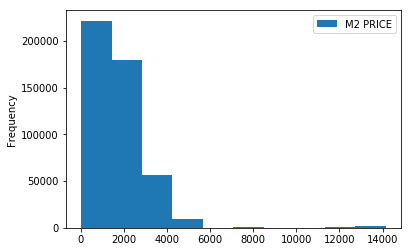

In [71]:
landvalueDF.plot(kind='hist', y='M2 PRICE');

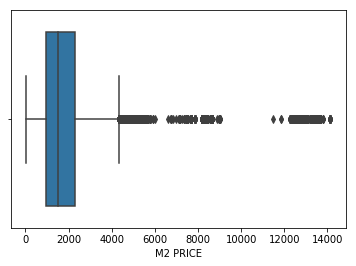

In [72]:
sns.boxplot(x=landvalueDF['M2 PRICE']);

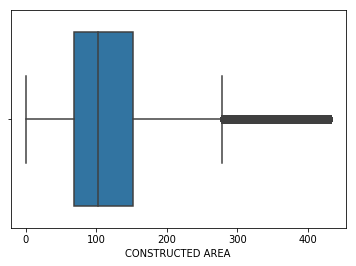

In [53]:
sns.boxplot(x=landvalueDF['CONSTRUCTED AREA']);

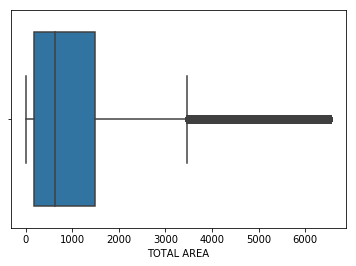

In [54]:
sns.boxplot(x=landvalueDF['TOTAL AREA']);

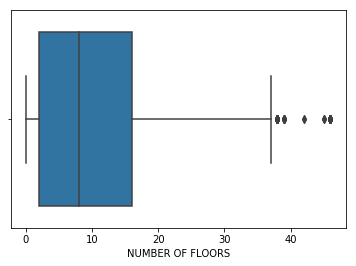

In [55]:
sns.boxplot(x=landvalueDF['NUMBER OF FLOORS'])

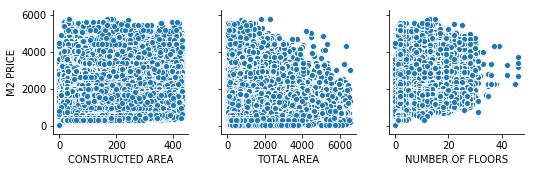

In [56]:
sns.pairplot(landvalueDF, x_vars=['CONSTRUCTED AREA', 'TOTAL AREA', 'NUMBER OF FLOORS'], y_vars=['M2 PRICE']);

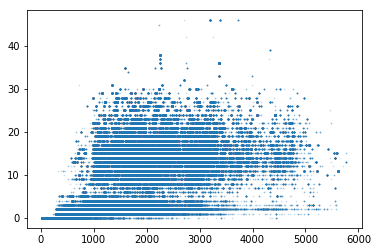

In [58]:
plt.scatter(landvalueDF['M2 PRICE'], landvalueDF['NUMBER OF FLOORS'], alpha=0.2, s=0.5);

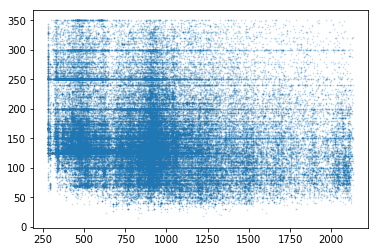

In [59]:
plt.scatter(landvalueDF['M2 PRICE'], landvalueDF['TOTAL AREA'], alpha=0.2, s=0.5);

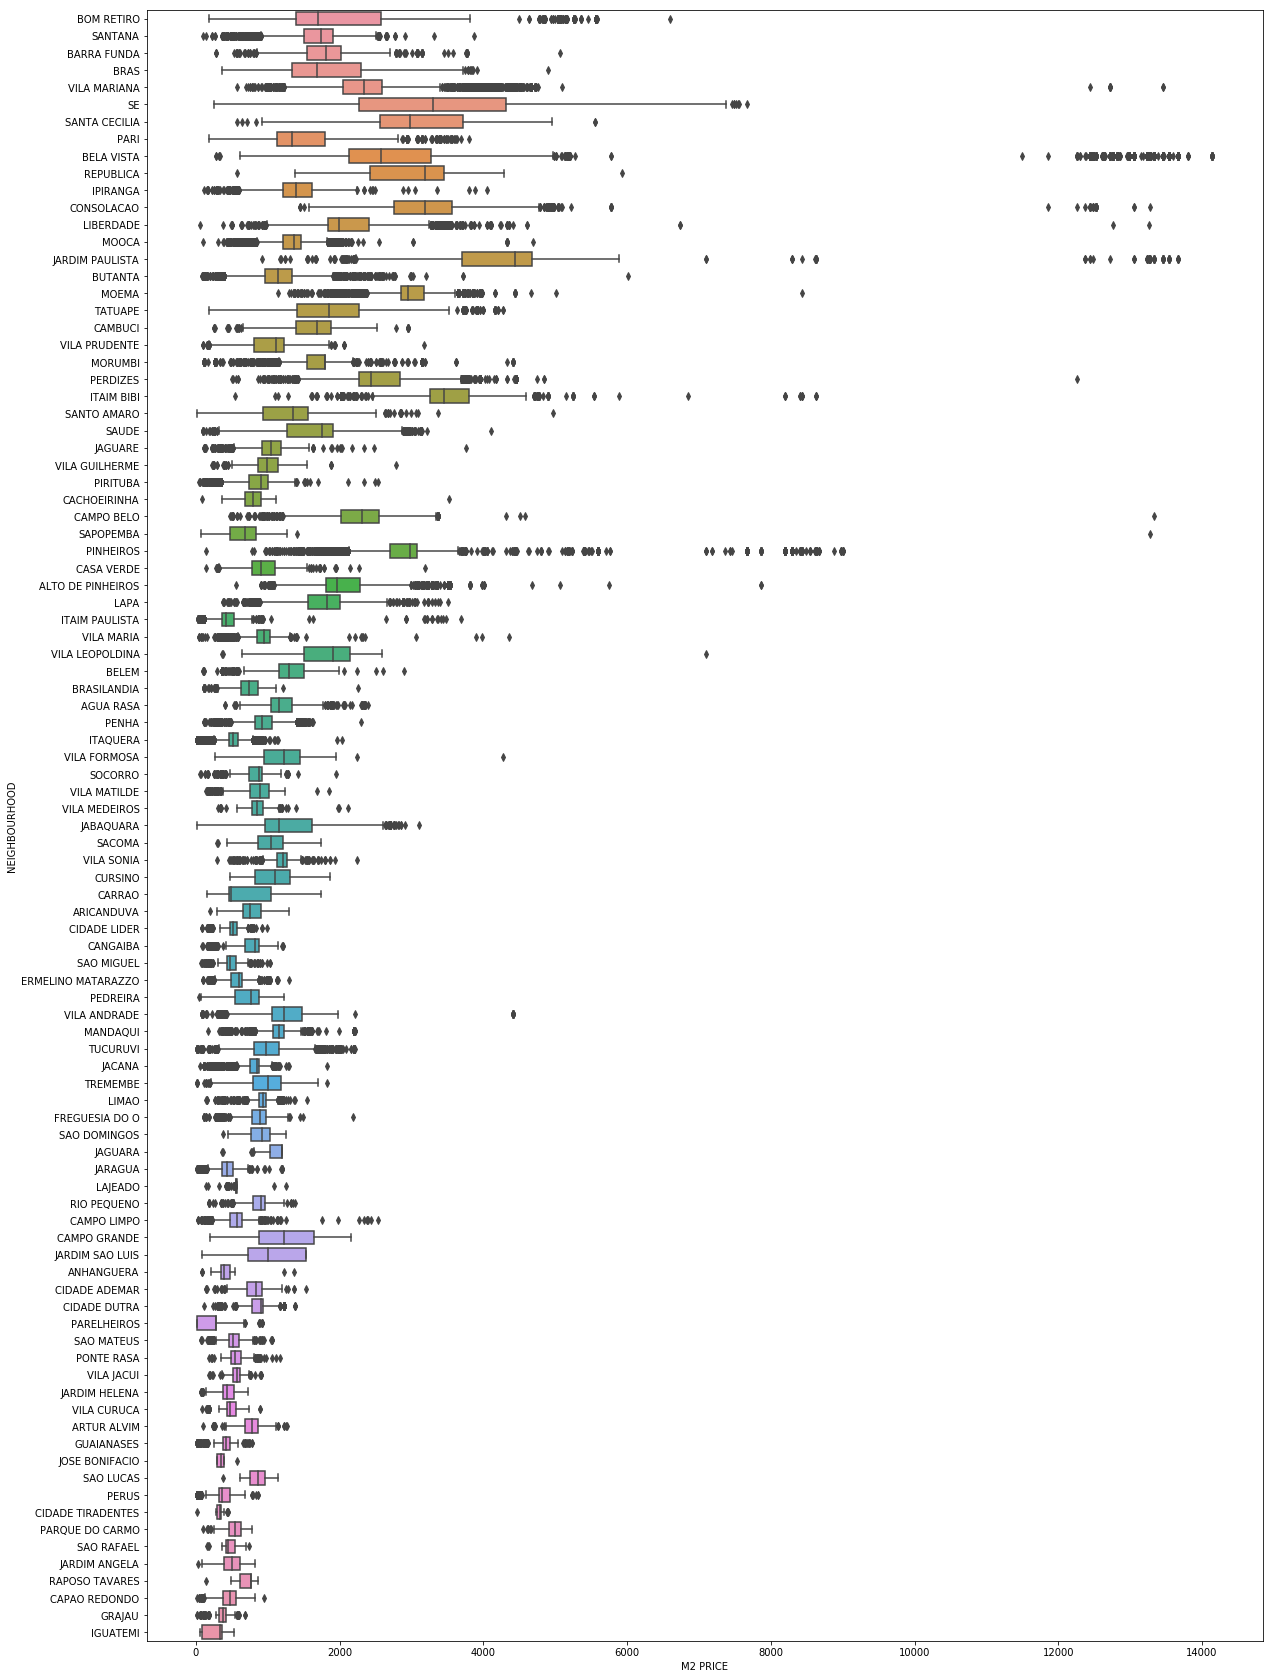

In [73]:
plt.figure(figsize=(20, 30))
sns.boxplot(x="M2 PRICE", y="NEIGHBOURHOOD", data=landvalueDF);

### Get mean value for each district

In [67]:
meanLandvalueDF = landvalueDF.groupby(landvalueDF['NEIGHBOURHOOD'], as_index=False)['M2 PRICE'].mean()
meanLandvalueDF.sort_values('M2 PRICE', ascending=False).head(10)

,NEIGHBOURHOOD,M2 PRICE
43,JARDIM PAULISTA,2093.125000
51,MOEMA,1945.470149
61,PINHEIROS,1925.752768
25,CONSOLACAO,1895.833333
89,VILA MARIANA,1859.066585
67,SANTA CECILIA,1824.138889
59,PERDIZES,1823.320841
6,BELA VISTA,1806.515000
1,ALTO DE PINHEIROS,1749.643443
14,CAMPO BELO,1749.451797


## Plot Mean Neighbourhood prices in a Choroplet Map
Load districts GEOJSON and plot Choroplet.

In [68]:
urlGeoJson = 'https://raw.githubusercontent.com/guilhermelemmi/landvalue-sp/master/data/distritos_sp.json'
geojsonFile = urlopen(urlGeoJson)
geojson = json.loads(geojsonFile.read())

In [71]:
# create a numpy array of length 6 and has linear spacing from the minium total immigration to the maximum total immigration
threshold_scale = np.linspace(meanLandvalueDF['M2 PRICE'].min(),
                              meanLandvalueDF['M2 PRICE'].max(),
                              5, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration

map = folium.Map(location=[-23.549896, -46.631258], zoom_start=12)

folium.Choropleth(
    geo_data=geojson,
    data=meanLandvalueDF,
    columns=['NEIGHBOURHOOD', 'M2 PRICE'],
    key_on='feature.properties.nomecaps',
    threshold_scale=threshold_scale,
    fill_color='YlGn', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Sao Paulo land value',
).add_to(map)

folium.LayerControl().add_to(map)
map

## Perform One-Hot-Encoding for the Neighbourhood

In [ ]:
numeric_subset = landvalueDF.select_dtypes('number')
categorical_subset = landvalueDF.select_dtypes('object')

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset[categorical_subset.columns.drop('NEIGHBOURHOOD')])